In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx
import community
import os

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [8]:
#------------------------------------------------------------------------------------------------------
#                                 Trabajo Computacional 3
#------------------------------------------------------------------------------------------------------

# Primero creamos la red de delfines: agregamos los enlaces sin necesidad de agregar antes los nodos
mydolphins = nx.read_gml('dolphins.gml')

# Para agregar el dato del genero a partir del txt:
# creamos dos listas: una de nombres de delfines (nodos) y otra de los generos correspondientes
Gender = pd.read_csv('dolphinsGender.txt', sep='\t', header=None)
delfines = Gender[0] # nombres de delfines (nodos)
genero = Gender[1]   # genero de los delfines en el mismo orden que los nodos

# A cada uno de los nodos ya existentes en el grafo, se le agrega el genero
for d,g in zip(delfines,genero):
    mydolphins.add_node(d, gender=g)


(-1.0, 1.0, -1.0, 1.5)

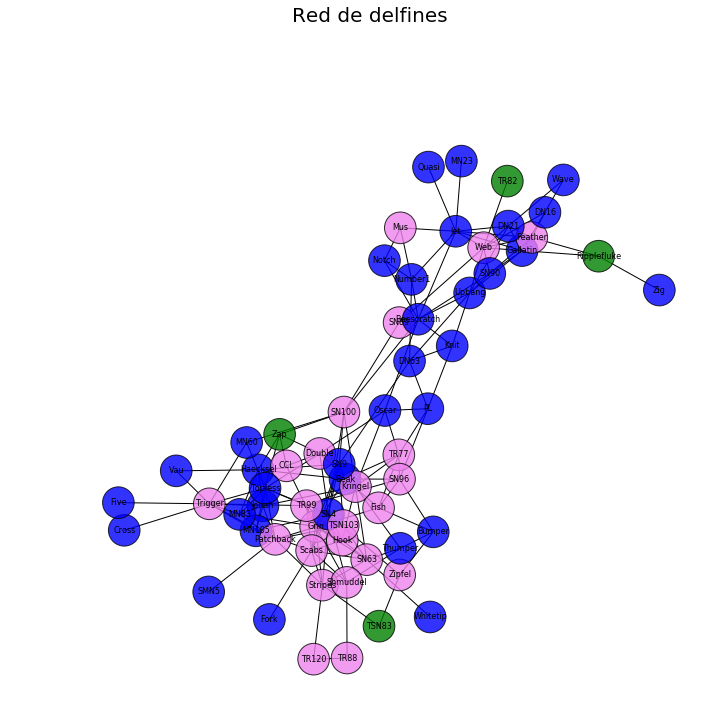

In [9]:
#------------------------------------------------------------------------------------------------------
#Grafico Original
#------------------------------------------------------------------------------------------------------
width=12
height=12
fig=plt.figure(figsize=(width, height))
fig.patch.set_facecolor('white')
pos = nx.spring_layout(mydolphins)

#Nodos
nx.draw_networkx_nodes(mydolphins,pos,nodelist=mydolphins.nodes(),node_color=["blue" if g=="m" else "violet" if g=="f" else "green" for g in nx.get_node_attributes(mydolphins, "gender").values()],with_labels=True,node_size=1000,alpha=0.8)

#Enlaces
nx.draw_networkx_edges(mydolphins,pos,width=1.0,alpha=1)

#Etiquetas
nx.draw_networkx_labels(mydolphins,pos,font_size=8)
plt.title('Red de delfines',fontsize=20)
plt.axis('off')

In [10]:
#------------------------------------------------------------------------------------------------------
#Metodo: Fast Greedy
#------------------------------------------------------------------------------------------------------
comus = nx.algorithms.community.greedy_modularity_communities(mydolphins, weight=None)
comunidades=list(comus)
print(comunidades)

[frozenset({'TSN83', 'TR77', 'Grin', 'Stripes', 'Beak', 'Fork', 'SN63', 'Kringel', 'SN9', 'Whitetip', 'Hook', 'Shmuddel', 'Zipfel', 'SN4', 'TR99', 'Oscar', 'TSN103', 'TR120', 'Thumper', 'TR88', 'Fish', 'Bumper', 'Scabs', 'SN96'}), frozenset({'TR82', 'SN90', 'Gallatin', 'Number1', 'PL', 'Wave', 'Jet', 'Zig', 'Mus', 'DN21', 'DN16', 'Notch', 'MN23', 'Web', 'Quasi', 'Ripplefluke', 'DN63', 'Beescratch', 'Feather', 'Upbang', 'Knit'}), frozenset({'Haecksel', 'Double', 'Patchback', 'CCL', 'Zap', 'SMN5', 'Trigger', 'MN83', 'Topless', 'Jonah', 'Vau', 'Cross', 'MN60', 'MN105', 'Five'}), frozenset({'SN89', 'SN100'})]


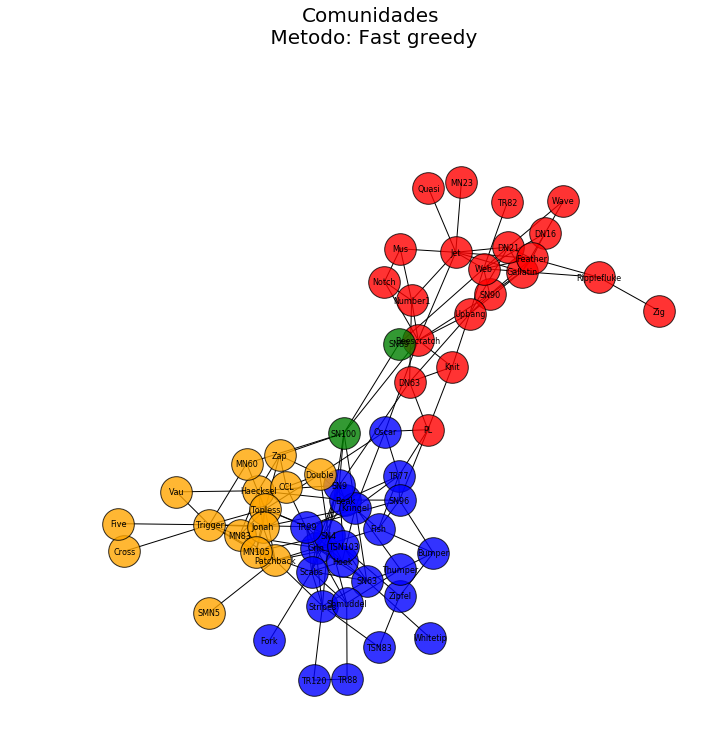

In [11]:
#------------------------------------------------------------------------------------------------------
#1.a)Visualice los resultados gráficamente
#------------------------------------------------------------------------------------------------------
colores=['blue','red','orange','green']
width=12
height=12
fig = plt.figure(figsize=(width, height))
fig.patch.set_facecolor('white')

#Nodos
for c,comu in enumerate(comunidades):
    nx.draw_networkx_nodes(mydolphins,pos,nodelist=comu,node_color=colores[c],node_size=1000,alpha=0.8)

#Enlaces
nx.draw_networkx_edges(mydolphins,pos,width=1.0,alpha=1)

#Etiquetas
nx.draw_networkx_labels(mydolphins,pos,font_size=8)
plt.title('Comunidades\n Metodo: Fast greedy',fontsize=20)
plt.axis('off')

plt.show()

In [12]:
#-------------------------------------------------------------------------------
#2.a) Modularidad y Silouhette:
#-------------------------------------------------------------------------------
#Asignamos a cada nodo del grafo la propiedad comunity que tendrá un color.

for c,comu in enumerate(comunidades):
    for delfin in list(comu):
        mydolphins.node[delfin]['comunity']=colores[c]
#-------------------------------------------------------------
#Modularidad:
#-------------------------------------------------------------
#Matriz de Adyacencias Aij:
delfines=mydolphins.nodes()
A = np.array(nx.to_numpy_matrix(mydolphins,nodelist=delfines))
N=mydolphins.number_of_nodes()
m=mydolphins.number_of_edges()
grado = dict(mydolphins.degree())

#Matriz de variable categorica comunidad: Cij=delta(ci,cj)
C=np.zeros(np.shape(A))
for ni, idelfin in enumerate(delfines):
    for nj, jdelfin in enumerate(delfines):
        if mydolphins.nodes[idelfin]['comunity']==mydolphins.nodes[jdelfin]['comunity']:
            C[ni,nj]=1

#Calculo de la modularidad
#Q/Qmax=(S1-S2)*(1/2m)

#S1=Suma en nodos (Aij*Cij)
#S2=Suma en nodos(kikj*Cij/2m)
S1=0
S2=0
for ni, idelfin in enumerate(delfines):
    for nj, jdelfin in enumerate(delfines):  
        S1=S1+A[ni,nj]*C[ni,nj]
        S2=S2+grado[idelfin]*grado[jdelfin]*C[ni,nj]
S2=S2/(2*m)
mod=(S1-S2)/(2*m)


print('Modularidad Q = {0:.3f}'.format(mod))

Modularidad Q = 0.492


Silhouette S[i]=
[('TR82', -0.02777777777777785), ('Haecksel', 0.30666666666666664), ('Double', 0.15636363636363632), ('Knit', 0.12380952380952373), ('TSN83', 0.23750000000000007), ('Gallatin', 0.35238095238095235), ('SN89', 0.8055555555555556), ('TR77', 0.06666666666666661), ('Trigger', 0.4666666666666667), ('Feather', 0.2761904761904762), ('DN16', 0.08571428571428577), ('Grin', 0.2803030303030304), ('MN23', 0.17460317460317457), ('Stripes', 0.21428571428571436), ('DN63', 0.14285714285714288), ('Beescratch', -0.21249999999999997), ('DN21', 0.29523809523809524), ('Number1', 0.21904761904761907), ('CCL', -0.029605263157894635), ('SMN5', 0.25194805194805203), ('Beak', 0.2), ('Fork', 0.21250000000000002), ('SN63', 0.3), ('Jonah', 0.35438596491228064), ('Kringel', -0.2), ('Topless', 0.4571428571428572), ('Web', -0.10000000000000003), ('MN60', -0.19642857142857145), ('Upbang', 0.11904761904761907), ('MN105', 0.28571428571428575), ('Bumper', 0.31250000000000006), ('SN90', 0.02380952380952383

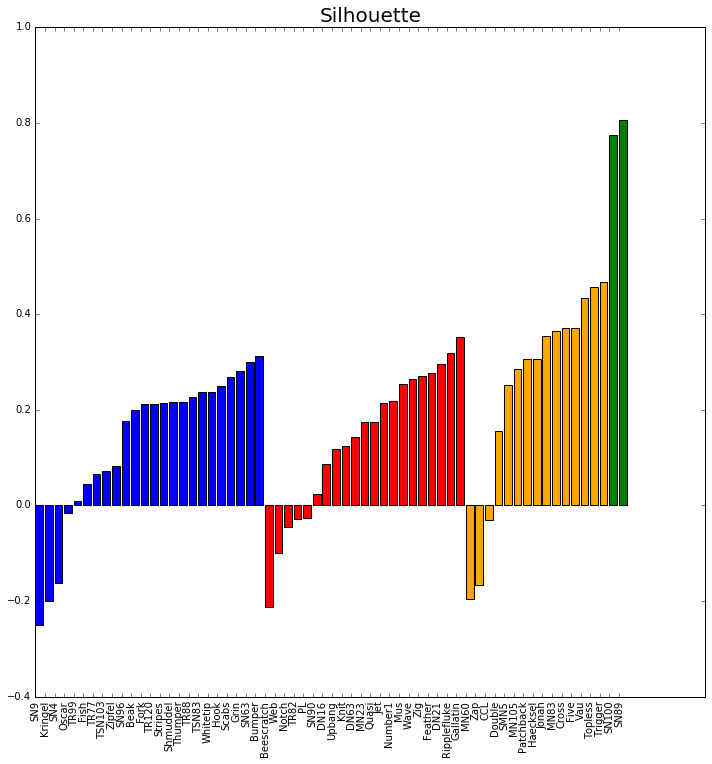

In [16]:
#-------------------------------------------------------------
#Silhouette:
#-------------------------------------------------------------
#distancia promedio de un nodo a todos los de su comunidad
#distancia se podria medir como el numero de links en el camino mas corto para llegar a otro.
#Ej:
#distancia entre 'Jet' y 'Trigger' = len(nx.shortest_path(mydolphins,'Jet','Trigger')) - 1

#Calculo de a[i]
a=[] #contendra para cada nodo en delfines la distancia promedio a nodos de su misma comunidad
for idelfin in delfines:
    distancias=[]
    for jdelfin in delfines:
        if mydolphins.nodes[idelfin]['comunity']==mydolphins.nodes[jdelfin]['comunity']:
               distancias.append(len(nx.shortest_path(mydolphins,idelfin,jdelfin))-1)         
    promedio=np.mean(distancias)
    a.append(promedio)

#Calculo de b[i]
b=[] #contendria para cada nodo en delfines la distancia promedio a nodos de otras comunidades, devuelvo  el promedio minimo
for idelfin in delfines: 
    #Me quedo con las comunidades distintas a la del delfin idelfin
    comuni=['blue','red','orange','green']
    comuni.remove(mydolphins.node[idelfin]['comunity'])
    b_comuni=[]
    for c in comuni:
        distancias=[]
        for jdelfin in delfines:
            if mydolphins.nodes[jdelfin]['comunity']==c:
                distancias.append(len(nx.shortest_path(mydolphins,idelfin,jdelfin))-1)
        promedio_comuni=np.mean(distancias)
        b_comuni.append(promedio_comuni)
    b.append(min(b_comuni))
    comuni=['blue','red','orange','green'] #vuelvo a comuni al inicial

#Calculo el Silhouette:
S=[]
for i,idelfin in enumerate(delfines):
    s=(b[i]-a[i])/(max(b[i],a[i]))
    S.append(s)
    #guardo la propiedad silhouette en el grafo:
    mydolphins.node[idelfin]['silhouette']=s
print('Silhouette S[i]=')
print (mydolphins.nodes.data('silhouette'))

#Grafico de Silhouette:
width=12
height=12
plt.figure(figsize=(width, height))
delfines=np.sort(delfines)
x = []
xTicks = []
contador=-1
dtype = [('name', 'S21'), ('silhouette', float)]
for c in colores:
    delf_S=[] #lista con pares de [delfin,silouette]
    for i, idelfin in enumerate(delfines):
        if mydolphins.nodes[idelfin]['comunity']==c:
            delf_S.append((str(idelfin),mydolphins.nodes[idelfin]['silhouette']))        
    delf_S=np.array(delf_S,dtype=dtype)
    delf_S=np.sort(delf_S,order='silhouette') #lo ordeno segun la propiedad silhouette
    delf_S=list(delf_S)
    for j,d in enumerate(delf_S):
        contador=contador+1
        delfin=str(delf_S[j][0],'utf-8')
        silhouette_value=delf_S[j][1]
        plt.bar(contador,silhouette_value,color=mydolphins.nodes[delfin]['comunity'])#grafico una barra
        x.append(contador)
        xTicks.append(delfin)
plt.xticks(x, xTicks)
plt.xticks(range(len(delfines)),xTicks, rotation=90)
plt.title('Silhouette',fontsize=20)
plt.show()